# L0-7 | Linear Regression code


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('housing.csv')
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
483,2940000,6615,3,1,2,yes,no,no,no,no,0,no,semi-furnished
480,2940000,3480,3,1,2,no,no,no,no,no,1,no,semi-furnished
385,3570000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
140,5740000,5800,3,2,4,yes,no,no,no,yes,0,no,unfurnished
506,2604000,2910,2,1,1,no,no,no,no,no,0,no,unfurnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
enc = OrdinalEncoder()

df['mainroad'] = enc.fit_transform(df[['mainroad']])
df['guestroom'] = enc.fit_transform(df[['guestroom']])
df['basement'] = enc.fit_transform(df[['basement']])
df['hotwaterheating'] = enc.fit_transform(df[['hotwaterheating']])
df['airconditioning'] = enc.fit_transform(df[['airconditioning']])
df['prefarea'] = enc.fit_transform(df[['prefarea']])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0


In [13]:
rank = ['unfurnished','semi-furnished','furnished']
oe = OrdinalEncoder(categories=[rank])
df['furnishingstatus'] = oe.fit_transform(df[['furnishingstatus']])

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,2.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,2.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,2.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,2.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

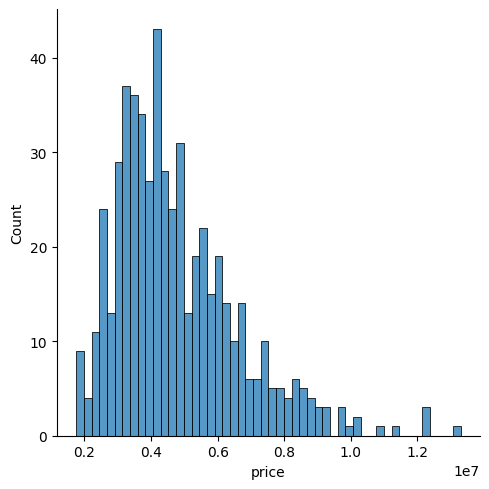

In [16]:
sns.displot(df['price'],bins=50)

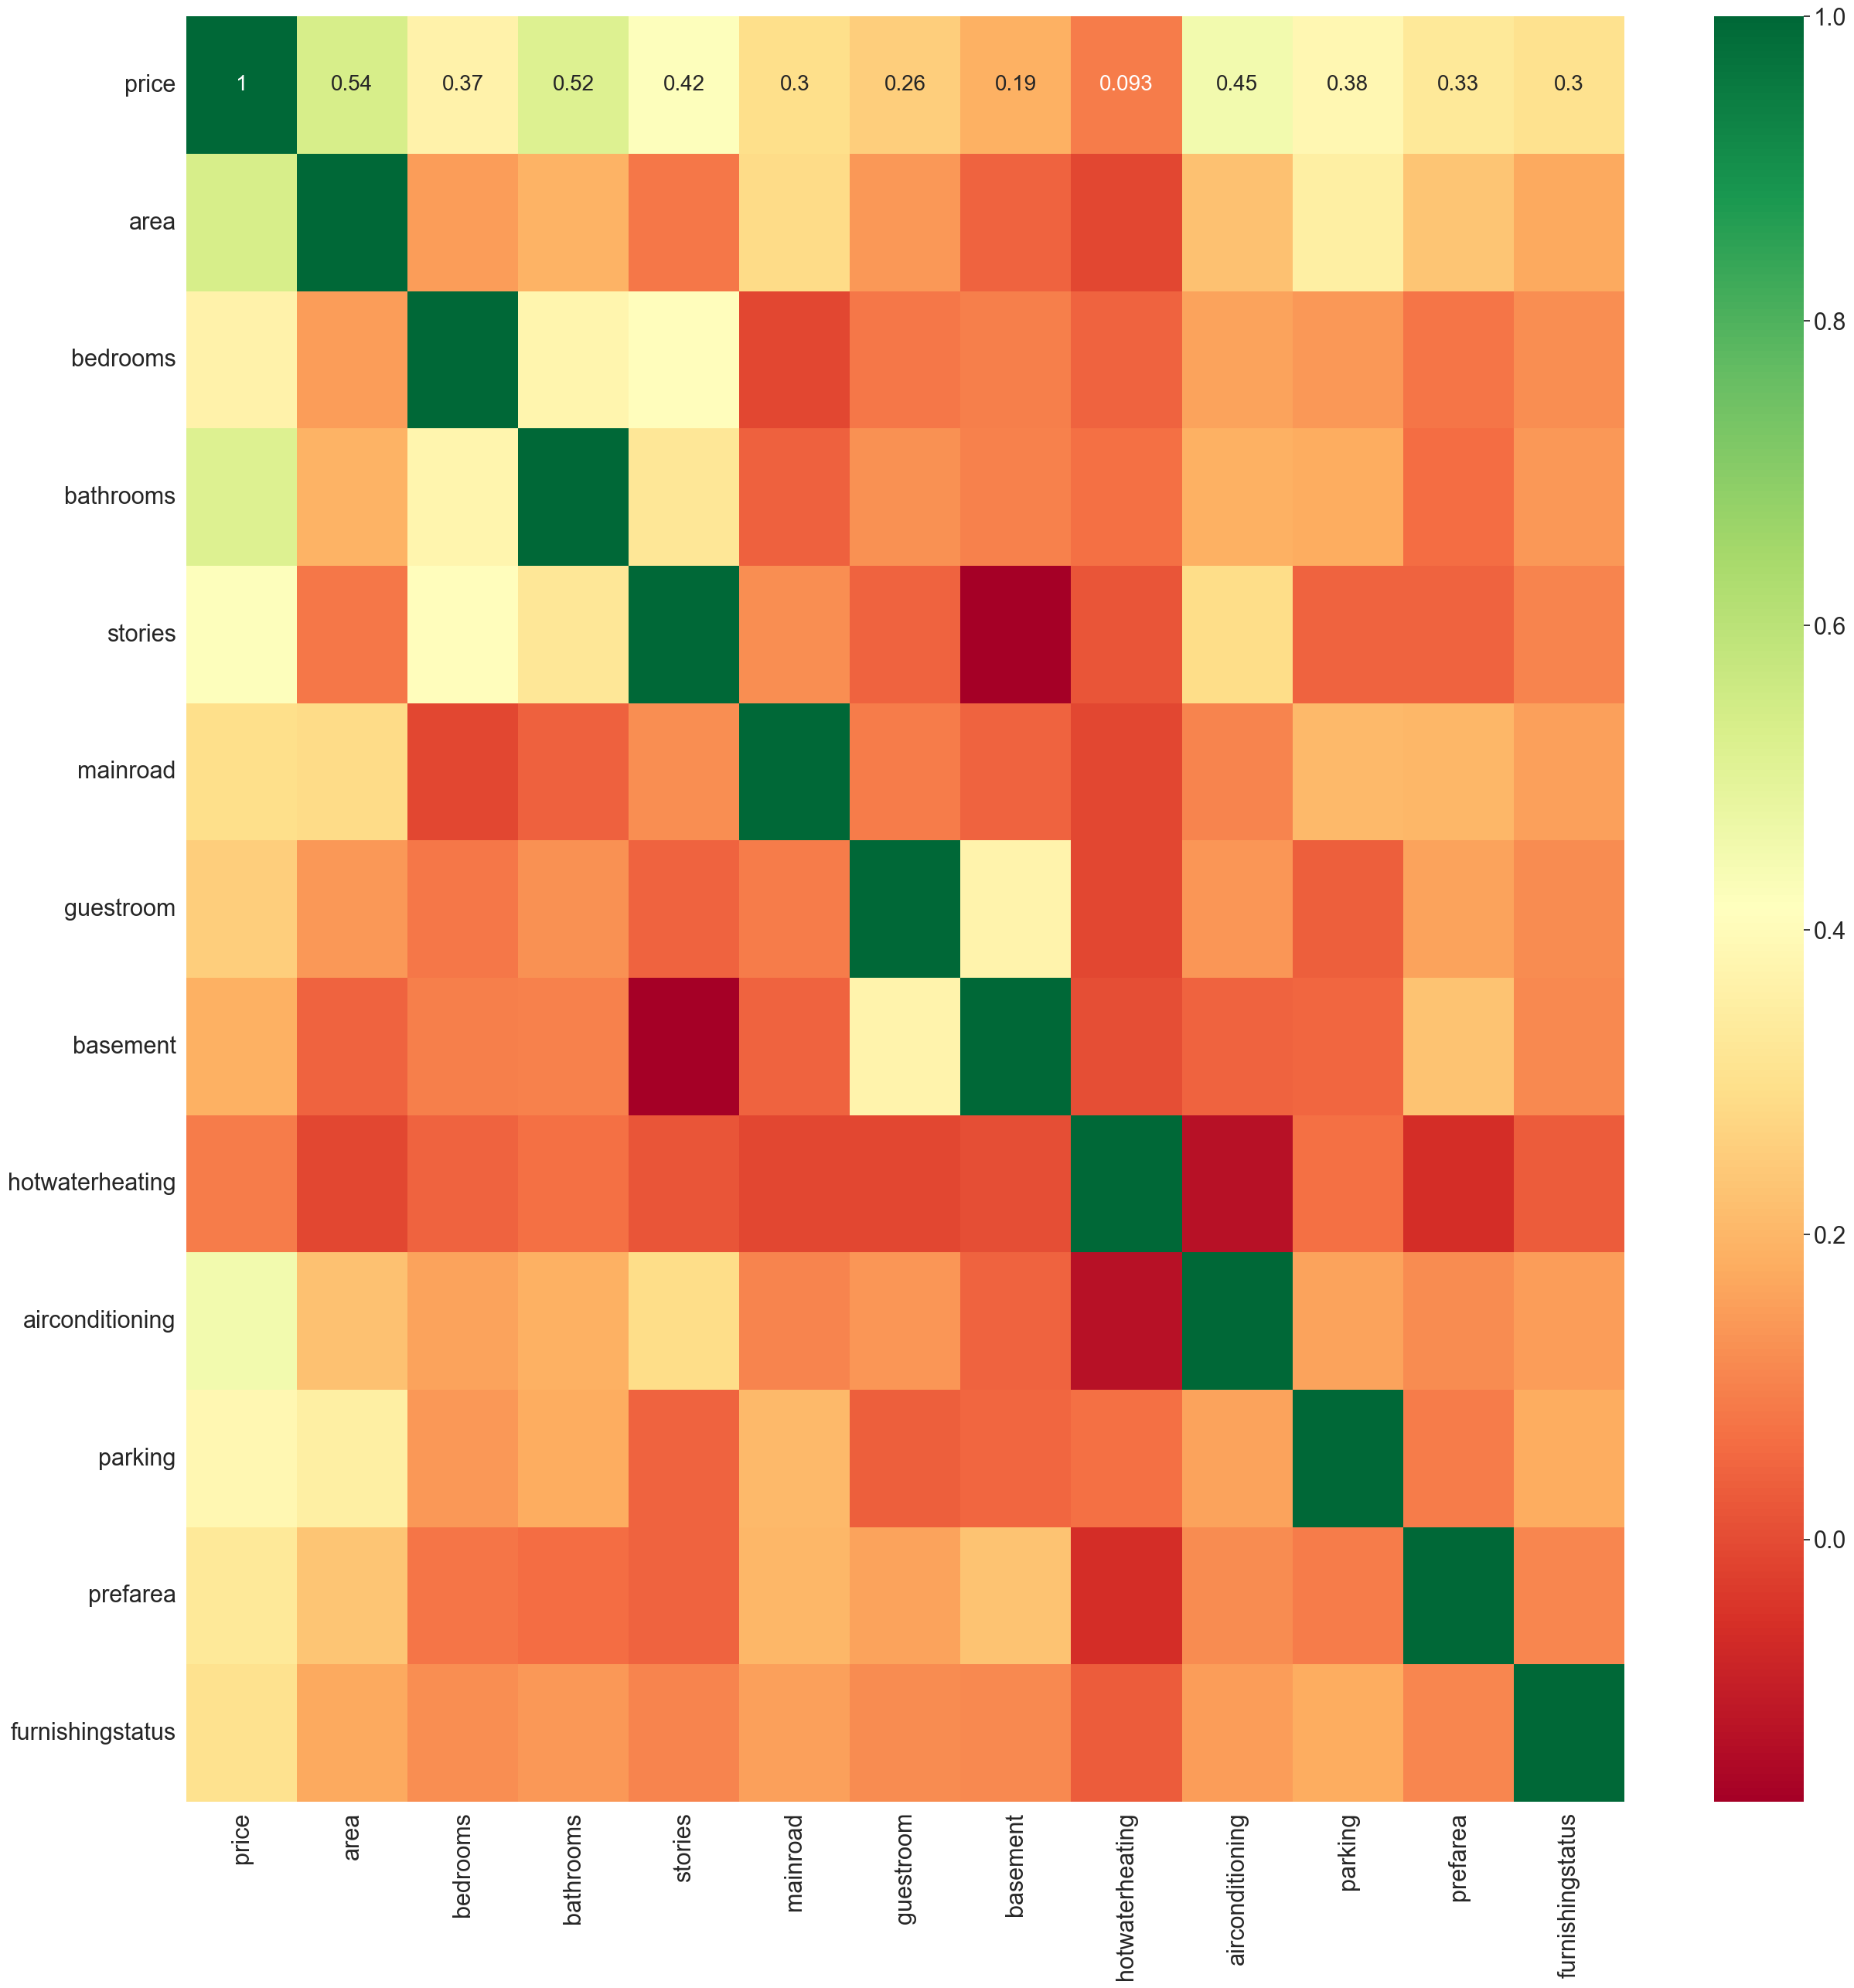

In [21]:
sns.set(font_scale=2)
plt.subplots(figsize=(30,30))
heat_plot = sns.heatmap(df.corr(method='pearson'),annot=True,cmap="RdYlGn",annot_kws={'size':20})

In [22]:
x = df.drop(['price'],axis=1)
y = df['price']

In [23]:
print(x.shape)
print(y.shape)

(545, 12)
(545,)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [26]:
x_train

array([[0.77544828, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33896552, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.18689655, 0.2       , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       ...,
       [0.71655172, 0.6       , 0.5       , ..., 0.66666667, 1.        ,
        1.        ],
       [0.16137931, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.29655172, 0.4       , 0.5       , ..., 0.        , 0.        ,
        0.5       ]])

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

##### y = Wx + b

##### same as y = mx + c


In [28]:
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = reg.predict(x_test)

In [30]:
y_pred

array([ 6567434.63270913,  6126075.80394425,  3818274.52034406,
        4464841.23677547,  4216868.9611377 ,  3433972.86958904,
        4942727.9109151 ,  6192624.20921599,  5654808.30847639,
        6436788.4548143 ,  6606879.09046406,  5270044.29430553,
        6280558.31760521,  2688871.26274929,  7076165.03963449,
        5623722.96245129,  5934049.88113635,  2113563.13708185,
        7630771.74311085,  4660929.35243667,  4077630.93230269,
        2324051.69158948,  7721745.27484109,  4432520.74781798,
        4216474.10740028,  3949498.63226065,  4336308.61002829,
        5312551.46470409,  6854356.38595177,  4065790.50958258,
        3327664.02060812,  6781271.42427421,  6551265.43169912,
        6987664.12713507,  2913411.47909498,  3020491.28106745,
        4103245.78152721,  7622810.07111567,  6751622.67631433,
        5406883.14147234,  8145707.73325843,  3233845.71205057,
        5005073.91427682,  4729208.82369594,  4276480.6679851 ,
        5118569.69151115,  8908518.58801

In [31]:
y_test

270    4340000
178    5229000
208    4900000
413    3430000
251    4515000
        ...   
250    4515000
517    2450000
148    5600000
512    2520000
159    5460000
Name: price, Length: 109, dtype: int64

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [33]:
R2 = r2_score(y_pred,y_test)
R2

0.5324424558523767

In [34]:
mse = mean_squared_error(y_pred,y_test)
mse

1191720834607.34

In [35]:
rmse = math.sqrt(mse)
rmse

1091659.6697722876

In [36]:
mae = mean_absolute_error(y_pred,y_test)
mae

819371.8299024516

# SVM Classifier Code


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('housing.csv')
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
235,4620000,5680,3,1,2,yes,yes,no,no,yes,1,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
243,4550000,2550,3,1,2,yes,no,yes,no,no,0,no,furnished
198,4935000,5948,3,1,2,yes,no,no,no,yes,0,no,semi-furnished


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC  

SVC_model = SVC()

k_fold = KFold(n_splits=10)

accuracy = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='accuracy')
precision = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='precision')
recall = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='recall')
f1_score = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='f1')
AUC = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='roc_auc')


In [41]:
accuracy

array([0.04545455, 0.02272727, 0.02272727, 0.04545455, 0.09090909,
       0.06818182, 0.02325581, 0.02325581, 0.        , 0.04651163])

In [42]:
overall_accuracy = sum(accuracy)/len(accuracy)

print(overall_accuracy)

0.03884778012684988


In [ ]:
precision

In [ ]:
overall_precision = sum(precision)/len(precision)

print(overall_precision)

In [ ]:
recall

In [ ]:
overall_recall = sum(recall)/len(recall)

print(overall_recall)

In [ ]:
f1_score

In [ ]:
overall_f1_score = sum(f1_score)/len(f1_score)

print(overall_f1_score)

## Test Performance (unseen data)


In [48]:
SVC_model = SVC(C=0.5,kernel='poly',degree=2,gamma='scale',coef0=0.0,tol=0.001,decision_function_shape='ovr')

In [49]:
SVC_model.fit(x_train,y_train)

SVC(C=0.5, degree=2, kernel='poly')

In [50]:
unseen_prediction= SVC_model.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_curve,recall_score,f1_score,roc_auc_score

print("accurccy",accuracy_score(unseen_prediction,y_test))
print("precision_score",precision_score(unseen_prediction,y_test))
print("recall",recall_score(unseen_prediction,y_test))
print("f1_score",f1_score(unseen_prediction,y_test))
print("roc_auc_score",roc_auc_score(unseen_prediction,y_test))